In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load the data:
df = pd.read_csv('https://bit.ly/3raML6h',
                 usecols=['season', 'weekday', 'hr', 'cnt'])

# Define a dictionary to map numerical values to day names
day_mapping = {0: 'Sunday', 1: 'Monday', 
               2: 'Tuesday', 3: 'Wednesday', 
               4: 'Thursday', 5: 'Friday',
               6: 'Saturday'}

# Map weekday numbers to names and create a new column:
df['Day'] = df['weekday'].map(day_mapping)
df = df.rename(columns={'hr': 'Hour', 'cnt': 'count'})
df.head(3)

,season,Hour,weekday,count,Day
0,1,0,6,16,Saturday
1,1,1,6,40,Saturday
2,1,2,6,32,Saturday


In [3]:
# Create a new DataFrame for the summer season:
df_summer = (df[(df['season'] == 2)].copy()
             .groupby(['Day', 'Hour'])['count']
             .sum().reset_index())

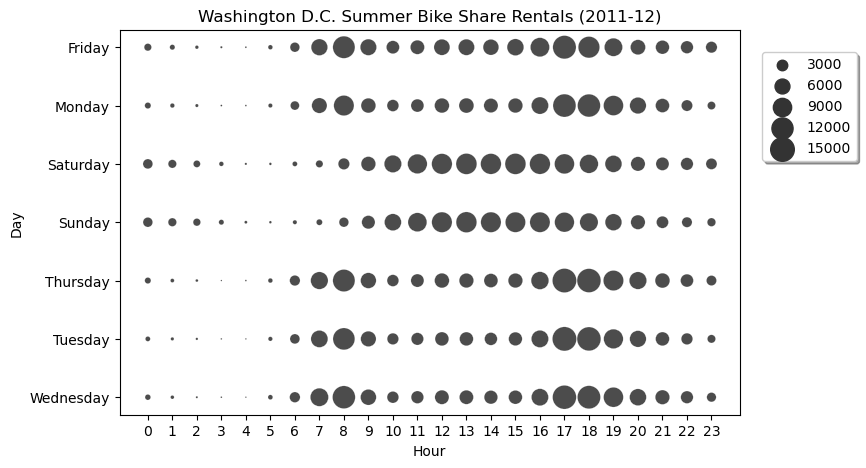

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.scatterplot(data=df_summer, 
                     x='Hour', 
                     y='Day', 
                     size='count',
                     color='k', 
                     alpha=0.7,
                     sizes=(1, 300))
ax.legend(loc='right', 
          shadow=True, 
          bbox_to_anchor=(1.2, 0.8), 
          ncol=1)
ax.set_xticks(range(24)) 
ax.set_xticklabels(list(range(24)))
ax.set_title('Washington D.C. Summer Bike Share Rentals (2011-12)');

# Optional code to add a grid:
# sns.set_style('whitegrid')
# ax.grid(True)

# Optional code to save figure as an image:
# plt.savefig('file_name.png', bbox_inches='tight', dpi=600)

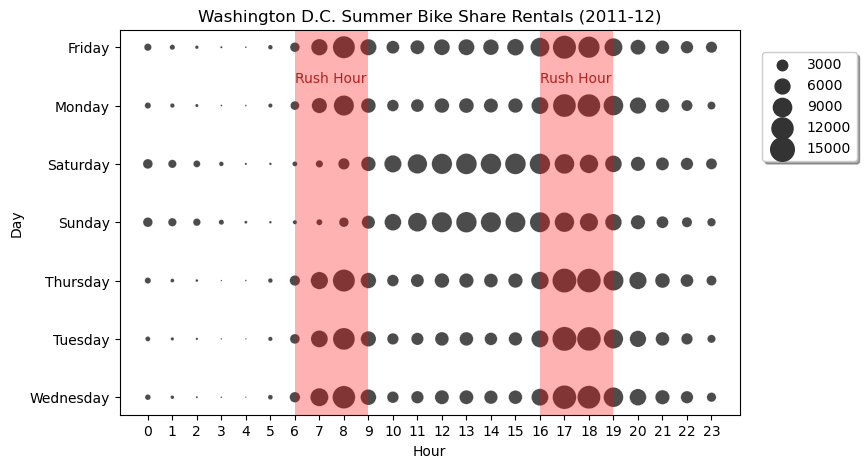

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.scatterplot(data=df_summer, 
                     x='Hour', 
                     y='Day', 
                     size='count',
                     color='k', 
                     alpha=0.7,
                     sizes=(1, 300))
ax.legend(loc='right', 
          shadow=True, 
          bbox_to_anchor=(1.2, 0.8), 
          ncol=1)
ax.set_xticks(range(24)) 
ax.set_xticklabels(list(range(24)))
ax.set_title('Washington D.C. Summer Bike Share Rentals (2011-12)');
# Add shading for rush hour:
ax.text(x=6, y=0.6, s='Rush Hour', c='firebrick')
ax.axvspan(xmin=6, xmax=9, facecolor='red', alpha=0.3)
ax.text(x=16, y=0.6, s='Rush Hour', c='firebrick')
ax.axvspan(xmin=16, xmax=19, facecolor='red', alpha=0.3);

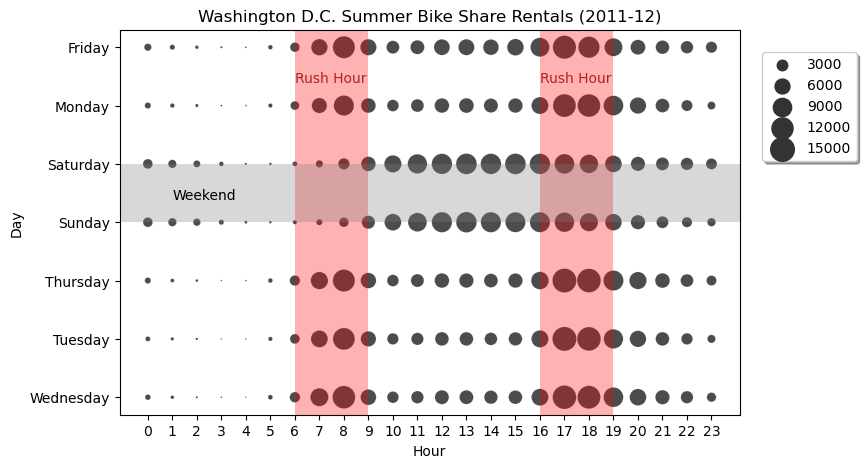

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.scatterplot(data=df_summer, 
                     x='Hour', 
                     y='Day', 
                     size='count',
                     color='k', 
                     alpha=0.7,
                     sizes=(1, 300))
ax.legend(loc='right', 
          shadow=True, 
          bbox_to_anchor=(1.2, 0.8), 
          ncol=1)
ax.set_xticks(range(24)) 
ax.set_xticklabels(list(range(24)))
ax.set_title('Washington D.C. Summer Bike Share Rentals (2011-12)');
# Add shading for rush hour:
ax.text(x=6, y=0.6, s='Rush Hour', c='firebrick')
ax.axvspan(xmin=6, xmax=9, facecolor='red', alpha=0.3)
ax.text(x=16, y=0.6, s='Rush Hour', c='firebrick')
ax.axvspan(xmin=16, xmax=19, facecolor='red', alpha=0.3);
# Add shading for weekend:
ax.axhspan(ymin='Sunday', ymax='Saturday', fc='grey', alpha=0.3)
ax.text(x=1, y=2.6, s='Weekend', c='k');

In [7]:
# Create a new dataframe for summer season:
df_summer_days = (df[(df['season'] == 2)].copy()
                  .groupby(['Day'])['count'].sum().reset_index())
df_summer_days = df_summer_days.sort_values('count')

print(df_summer_days)

         Day   count
1     Monday  123255
5    Tuesday  125449
3     Sunday  129650
6  Wednesday  130547
4   Thursday  135207
0     Friday  135792
2   Saturday  138689


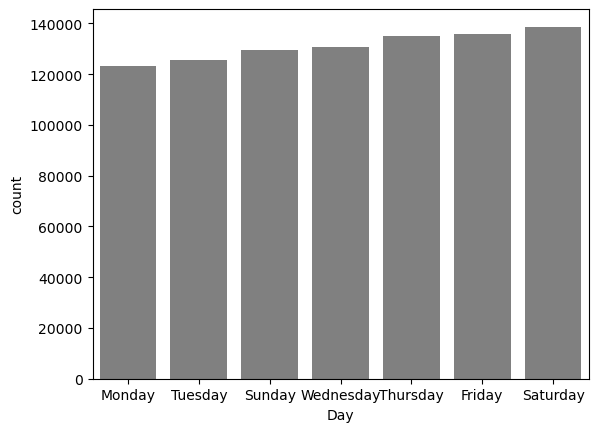

In [8]:
sns.barplot(data=df_summer_days, x='Day', y='count', color='grey');